In [1]:
from tensorflow.keras.models import Model # Импортируем модели keras: Model
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose, Dropout, BatchNormalization,Activation # Импортируем стандартные слои keras
from tensorflow.keras import backend as K # Импортируем модуль backend keras'а
from tensorflow.keras.optimizers import Adam, Nadam  # Импортируем оптимизатор Adam и Nadam
from tensorflow.keras import utils # Импортируем модуль utils библиотеки tensorflow.keras для получения OHE-представления
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
from tensorflow.keras.preprocessing import image # Импортируем модуль image для работы с изображениями
import numpy as np # Импортируем библиотеку numpy
from sklearn.model_selection import train_test_split # Импортируем модуль train_test_split
import random
import os # Импортируем библиотеку os для раоты с фаловой системой
from PIL import Image # импортируем модель Image для работы с изображениями
import re
from keras import backend as K #импортируем бэкенд Керас
from keras.utils.generic_utils import get_custom_objects # импортируем модуль для создание собственной функции потерь и метрики
import pandas as pd #импортируем пандас для визуализаци значений функции потерь

In [2]:
directory = 'H:\Segment\skin'# директория, в которой хранятся оригинальные и сегментированные изображения

In [3]:
origin_img = 'origin' # папка с оргинальными иозбражениями
segment_img = 'segmentation' # папка с сегментированными иозбражениями

In [4]:
img_width = 256
img_height = 256  # размер, к которому будем преобразовывать изображения 

In [5]:
sick_name = os.listdir(directory + f'\\{origin_img}') # создаем список с названиями болезней
print(sick_name)

['Акне', 'Витилиго', 'Герпес', 'Дерматит', 'Лишай', 'Невус', 'Псориаз', 'Сыпь', 'Хлоазма', 'Экзема']


In [6]:
def open_file(sick, type_img): # фукнция извлечения файлов из папок
    images = []
    for filename in sorted(os.listdir(directory + '\\' + f'{type_img}' + '\\' + f'{sick}' )):      
        images.append(image.load_img(f'H:\\Segment\\skin\\{type_img}\\{sick}\\{filename}',
                                       target_size=(img_width, img_height)))
    print (f'Количество изображений {sick}:  ', len(images))
    return images 


In [7]:
# используя фукнцию open_file создаем списки с оригинальными изображениями всех болезней

akne = open_file(sick_name[0], origin_img)

vitilingo = open_file(sick_name[1], origin_img)

herpes = open_file(sick_name[2], origin_img)

dermatit = open_file(sick_name[3], origin_img)

lichen = open_file(sick_name[4], origin_img)

nevus = open_file(sick_name[5], origin_img)

psoriasis = open_file(sick_name[6], origin_img)

rash = open_file(sick_name[7], origin_img)

chloasma = open_file(sick_name[8], origin_img)

eczema = open_file(sick_name[9], origin_img)

Количество изображений Акне:   510
Количество изображений Витилиго:   504
Количество изображений Герпес:   499
Количество изображений Дерматит:   500
Количество изображений Лишай:   502
Количество изображений Невус:   495
Количество изображений Псориаз:   500
Количество изображений Сыпь:   522
Количество изображений Хлоазма:   499
Количество изображений Экзема:   498


In [8]:
#train_img = akne + vitilingo + herpes + dermatit + lichen + nevus + psoriasis + rash + chloasma + eczema

In [9]:
train_img = vitilingo

In [10]:
len(train_img)

504

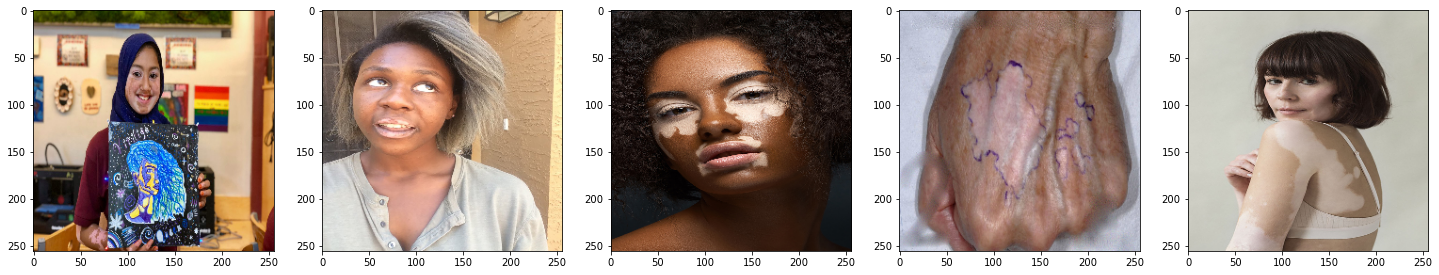

In [11]:
# посмотрим на первые пять оригинальных изображений 

n = 5 
fig, axs = plt.subplots(1, n, figsize=(25, 5)) 
for i in range(n): 
    img = train_img[i] 
    axs[i].imshow(img) 
plt.show() 

In [12]:
# используя фукнцию open_file создаем списки с сегментированными изображениями всех болезней

akne_segm = open_file(sick_name[0], segment_img)

vitilingo_segm = open_file(sick_name[1], segment_img)

herpes_segm = open_file(sick_name[2], segment_img)

dermatit_segm = open_file(sick_name[3], segment_img)

lichen_segm = open_file(sick_name[4], segment_img)

nevus_segm = open_file(sick_name[5], segment_img)

psoriasis_segm = open_file(sick_name[6], segment_img)

rash_segm = open_file(sick_name[7], segment_img)

chloasma_segm = open_file(sick_name[8], segment_img)

eczema_segm = open_file(sick_name[9], segment_img)

Количество изображений Акне:   510
Количество изображений Витилиго:   504
Количество изображений Герпес:   499
Количество изображений Дерматит:   500
Количество изображений Лишай:   502
Количество изображений Невус:   495
Количество изображений Псориаз:   500
Количество изображений Сыпь:   522
Количество изображений Хлоазма:   499
Количество изображений Экзема:   498


In [13]:
#train_segments = akne_segm + vitilingo_segm + herpes_segm + dermatit_segm + lichen_segm + nevus_segm + psoriasis_segm + rash_segm + chloasma_segm + eczema_segm

In [ ]:
# Для обучения используются только изображения с болезнью Витилиго, так как rgb массивы занимают слишком много оперативной памяти
# из-за чего не получается дойти до процесса обучения сетей.

In [14]:
train_seg = vitilingo_segm

In [15]:
len(train_seg)

504

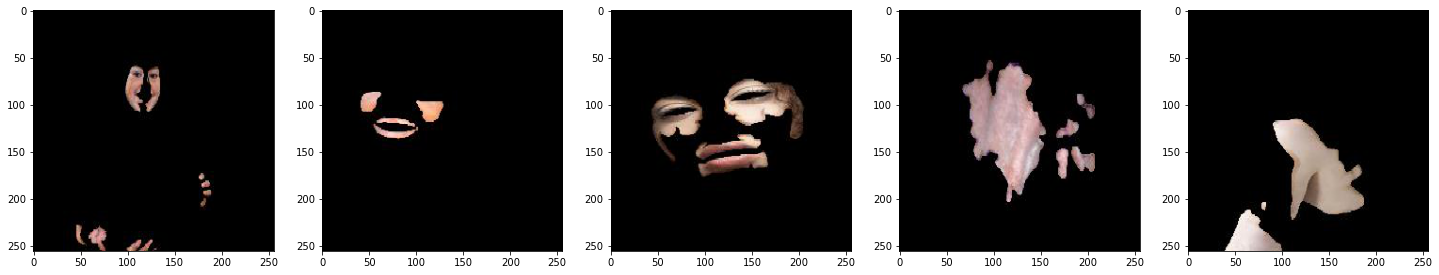

In [16]:
# посмотрим на первые пять сегментированных изображений 

fig, axs = plt.subplots(1, n, figsize=(25, 5)) 
for i in range(n):
    img = train_seg[i] 
    axs[i].imshow(img) 
plt.show() 

In [17]:
XX_train, XX_test, YY_train, YY_test = train_test_split(train_img,train_seg,test_size=0.1, shuffle=True) # выбираем из общей базы данных 10% изображений на тестовую выборку

In [18]:
X_train, X_val, Y_train, Y_val = train_test_split(XX_train,YY_train,test_size=0.2, shuffle = True) # делим оставшуюся выборку на обучающую и проверочную

In [19]:
from tensorflow.keras.utils import normalize

In [20]:
def img_to_np(data): # функция перевода изображения в массив numpy
    np_data = [np.array(i) for i in data]
    np_data = (np.array(np_data)/255).astype(np.float64)
    return np_data

In [21]:
# x_train = normalize(img_to_np(X_train))
# x_val = normalize(img_to_np(X_val))
# x_test = normalize(img_to_np(XX_test))

In [22]:
x_train = img_to_np(X_train)
x_val = img_to_np(X_val)
x_test = img_to_np(XX_test)

In [23]:
def imageToOHE(image): # функция преобразования сегментированной картинки в One Hot Encoding
    pic = np.array(image)
    res = np.zeros((img_width,img_height,1))
    for x in range(pic.shape[0]):
        for y in range(pic.shape[1]):
            if (pic[x, y, 0] > 0 and pic[x, y, 0] <= 30):
                res[x, y, 0] = 0
            if (pic[x, y, 0] > 30):
                res[x, y, 0] = 1.0
    return res

In [24]:
ohe_y_train = np.array([imageToOHE(img) for img in Y_train]).astype(np.float64)
ohe_y_val = np.array([imageToOHE(img) for img in Y_val]).astype(np.float64)    # Переводим сегментированные изображения в OHE
ohe_y_test = np.array([imageToOHE(img) for img in YY_test]).astype(np.float64)

In [25]:
print(x_train.shape)
print(ohe_y_train.shape)
print(x_val.shape)
print(ohe_y_val.shape)               # Посмотрим на размеры получивышихся выборок
print(x_test.shape)
print(ohe_y_test.shape)

(362, 256, 256, 3)
(362, 256, 256, 1)
(91, 256, 256, 3)
(91, 256, 256, 1)
(51, 256, 256, 3)
(51, 256, 256, 1)


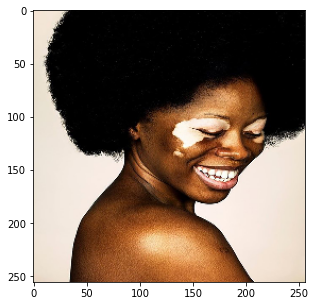

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(25, 5)) # выведем первое изображение из обучающей выборки с оргинальными изображениями
axs.imshow(X_train[1])
plt.show()

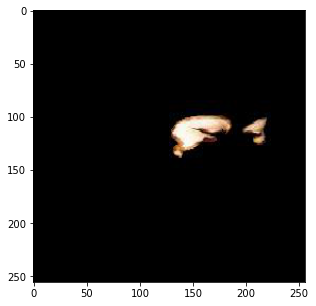

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(25, 5)) # выведем сегментированный аналог предыдущего изображения
axs.imshow(Y_train[1])
plt.show()

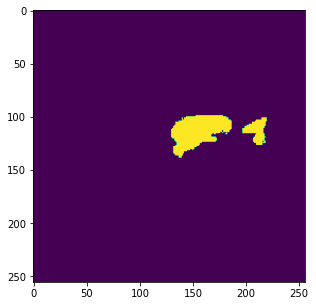

In [28]:
fig, axs = plt.subplots(1, 1, figsize=(25, 5)) # Выведем сегментированное изображение, преобразованное в OHE
axs.imshow(ohe_y_train[1])
plt.show()

In [29]:
def dice_coef(y_true, y_pred): # метрика для оценки качества работы нейронной сети
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred) 
    intersection = K.sum(y_true_f * y_pred_f)
    return K.mean((intersection * 2.0 + 1.0)/(K.sum(y_true_f) + K.sum(y_pred_f) +1.0))

def dice_coef_loss(y_true, y_pred): # функция потерь
    return -dice_coef(y_true, y_pred)

In [30]:
def jacard_coef(y_true, y_pred): # метрика для оценки качества работы нейронной сети
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0 ) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0 )

def jacard_coef_loss(y_true, y_pred): # функция потерь
    return -jacard_coef(y_true, y_pred)

In [31]:
get_custom_objects().update({"dice_coef_loss": dice_coef_loss, "jacard_coef_loss": jacard_coef_loss }) # Добавляем функцию потерь в словарь кастомных объектов Керас

In [32]:
print(get_custom_objects()) # убедимся, что наша функция потерь добавлена в словарь

{'Custom>Adadelta': <class 'keras.optimizer_experimental.adadelta.Adadelta'>, 'Custom>Adagrad': <class 'keras.optimizer_experimental.adagrad.Adagrad'>, 'Custom>Adam': <class 'keras.optimizer_experimental.adam.Adam'>, 'Custom>SGD': <class 'keras.optimizer_experimental.sgd.SGD'>, 'dice_coef_loss': <function dice_coef_loss at 0x0000027B3B974310>, 'jacard_coef_loss': <function jacard_coef_loss at 0x0000027B3B974820>}


In [33]:
# Входные параметры(размер изображений)

IMG_HEIGHT = x_train.shape[1]
IMG_WIDTH = x_train.shape[2]
IMG_CHANNELS = x_train.shape[3]

In [34]:
import keras

In [35]:
callbacks_list_unet = [
    keras.callbacks.ModelCheckpoint(
    filepath='model_unet.h5',
    monitor = 'val_dice_coef',
    save_best_only = True,
    )
]

In [36]:
callbacks_list_psp = [
    keras.callbacks.ModelCheckpoint(
    filepath='model_psp.h5',
    monitor = 'val_dice_coef',
    save_best_only = True,
    )
]

In [37]:
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
# Строим модель

# inputs = размер входного слоя( длина, ширина, количество каналов)

    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs

    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model

In [38]:
def PSPNet(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    img_input = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

    x = Conv2D(32, (3, 3), padding='same')(img_input)
    x = BatchNormalization()(x)
    x_c_1 = Activation('relu')(x)
    x = Conv2D(32, (3, 3), padding='same')(x_c_1)
    x = BatchNormalization()(x)
    x_c_2 = Activation('relu')(x)
    x = x_c_2

    x_mp_2 = MaxPooling2D(2)(x)
    x_mp_4 = MaxPooling2D(4)(x)
    x_mp_8 = MaxPooling2D(8)(x)

    x_mp_2 = Conv2D(32, (3, 3), padding='same', activation='relu')(x_mp_2)
    x_mp_4 = Conv2D(32, (3, 3), padding='same', activation='relu')(x_mp_4)
    x_mp_8 = Conv2D(32, (3, 3), padding='same', activation='relu')(x_mp_8)

    x_mp_2 = Conv2DTranspose(32, (2, 2), strides=(2, 2), activation='relu')(x_mp_2)
    x_mp_4 = Conv2DTranspose(32, (4, 4), strides=(4, 4), activation='relu')(x_mp_4)
    x_mp_8 = Conv2DTranspose(32, (8, 8), strides=(8, 8), activation='relu')(x_mp_8)

    fin = concatenate([img_input, x_c_1, x_c_2, x_mp_2, x_mp_4, x_mp_8])
    fin = Conv2D(32, (3, 3), padding='same')(fin)
    fin = BatchNormalization()(fin)
    fin = Activation('relu')(fin)
    fin = Conv2D(32, (3, 3), padding='same')(fin)
    fin = BatchNormalization()(fin)
    fin = Activation('relu')(fin)
    fin = Conv2D(1, (3, 3), activation='relu', padding='same')(fin)

    model = Model(img_input, fin)
    return model

In [39]:
# количество эпох обучения и размер batch_size

epochs = 10
bs = 4

In [40]:
model_psp = PSPNet(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [41]:
model_psp.compile(optimizer = Adam(learning_rate=1e-4), loss = [dice_coef_loss], metrics = [dice_coef])

# model.summary()

In [42]:
history_psp = model_psp.fit(x_train, ohe_y_train, epochs=epochs, verbose = 1, batch_size=bs, callbacks=callbacks_list_psp,
                       validation_data = (x_val, ohe_y_val))

Epoch 1/10
91/91 [==============================] - 9s 70ms/step - loss: -0.5362 - dice_coef: 0.5354 - val_loss: -0.2703 - val_dice_coef: 0.2688
Epoch 2/10
91/91 [==============================] - 5s 60ms/step - loss: -0.8372 - dice_coef: 0.8402 - val_loss: -0.1268 - val_dice_coef: 0.1255
Epoch 3/10
91/91 [==============================] - 5s 59ms/step - loss: -0.9867 - dice_coef: 0.9884 - val_loss: -0.6451 - val_dice_coef: 0.6419
Epoch 4/10
91/91 [==============================] - 5s 59ms/step - loss: -1.0234 - dice_coef: 1.0248 - val_loss: -0.7157 - val_dice_coef: 0.7128
Epoch 5/10
91/91 [==============================] - 5s 59ms/step - loss: -1.1137 - dice_coef: 1.1126 - val_loss: -1.1031 - val_dice_coef: 1.1025
Epoch 6/10
91/91 [==============================] - 5s 59ms/step - loss: -1.1684 - dice_coef: 1.1657 - val_loss: -1.2751 - val_dice_coef: 1.2723
Epoch 7/10
91/91 [==============================] - 5s 60ms/step - loss: -1.2109 - dice_coef: 1.2123 - val_loss: -1.0847 - val_dic

In [43]:
preds_psp = model_psp.predict(x_test,batch_size=bs,verbose = 1 ) # проверяем работу сети на тестовой выборке

13/13 [==============================] - 0s 17ms/step


In [44]:
i = iter(list(range(1000)))
# Визуализируем полученный результат
# по центру - входное изображение, слева - то, что должна была выделить сеть, справа - результат ее работы

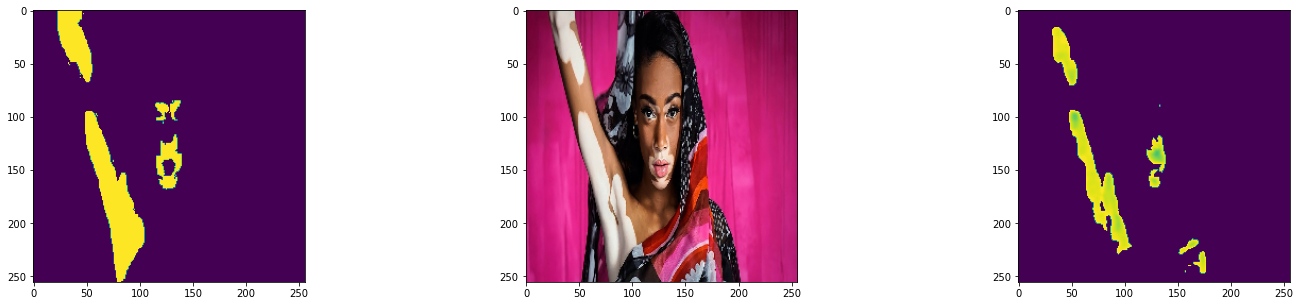

In [59]:
f, ax = plt.subplots(1,3, figsize=(25, 5))
n = next(i)
ax[0].imshow(255 * ohe_y_test[n])
pred_img = 255 * np.uint8(np.round(preds_psp[n]))[:, :, -1]
ax[2].imshow(pred_img)
ax[1].imshow(XX_test[n])

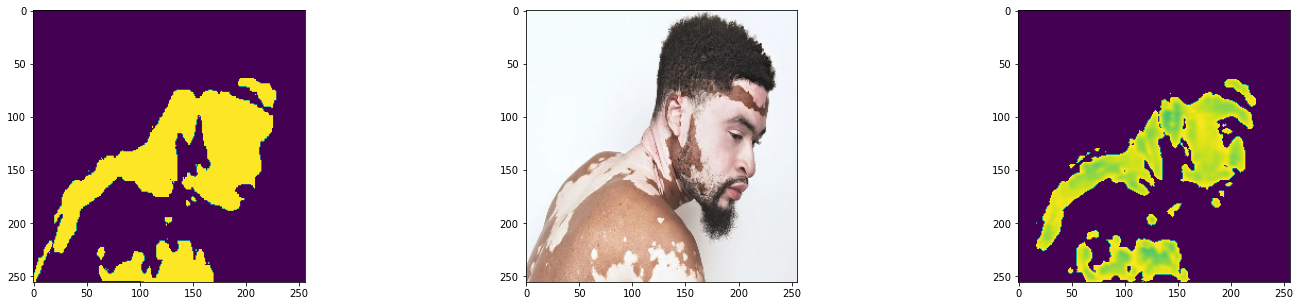

In [63]:
f, ax = plt.subplots(1,3, figsize=(25, 5))
n = next(i)
ax[0].imshow(255 * ohe_y_test[n])
pred_img = 255 * np.uint8(np.round(preds_psp[n]))[:, :, -1]
ax[2].imshow(pred_img)
ax[1].imshow(XX_test[n])

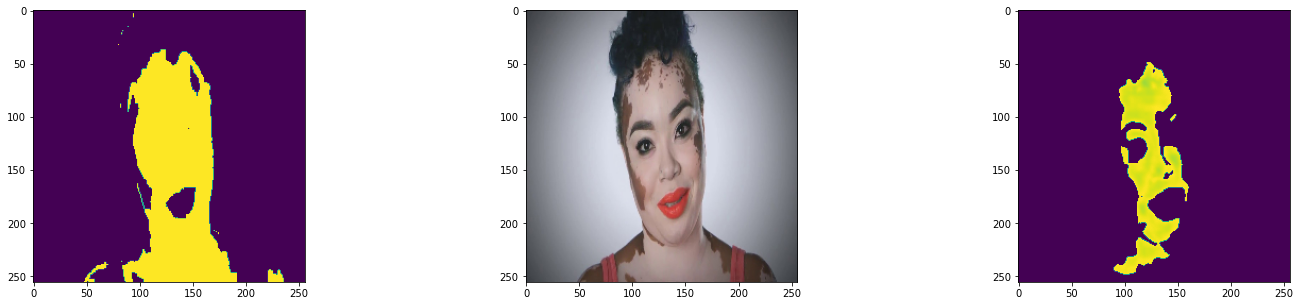

In [64]:
f, ax = plt.subplots(1,3, figsize=(25, 5))
n = next(i)
ax[0].imshow(255 * ohe_y_test[n])
pred_img = 255 * np.uint8(np.round(preds_psp[n]))[:, :, -1]
ax[2].imshow(pred_img)
ax[1].imshow(XX_test[n])

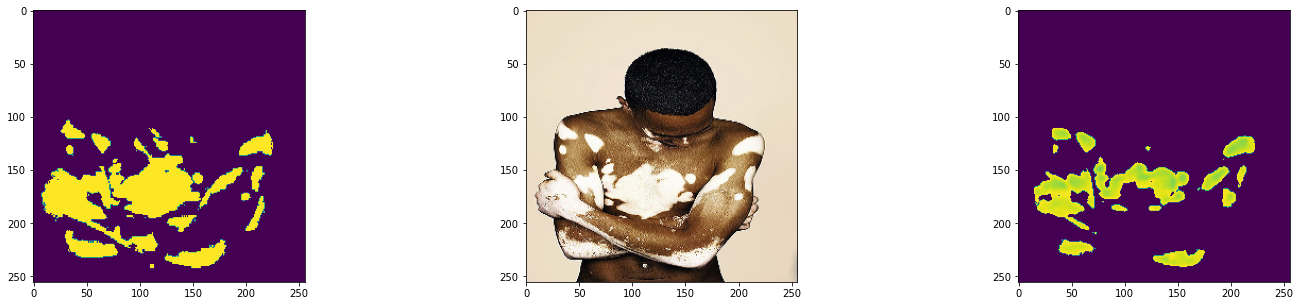

In [65]:
f, ax = plt.subplots(1,3, figsize=(25, 5))
n = next(i)
ax[0].imshow(255 * ohe_y_test[n])
pred_img = 255 * np.uint8(np.round(preds_psp[n]))[:, :, -1]
ax[2].imshow(pred_img)
ax[1].imshow(XX_test[n])

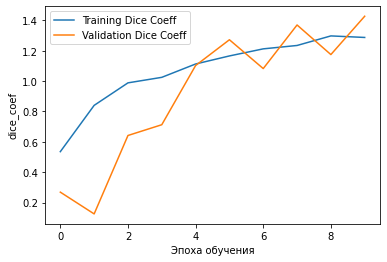

In [55]:
plt.plot(history_psp.history['dice_coef'], 
         label='Training Dice Coeff')
plt.plot(history_psp.history['val_dice_coef'], 
         label='Validation Dice Coeff')
plt.xlabel('Эпоха обучения')
plt.ylabel('dice_coef')
plt.legend()
plt.show()

In [ ]:
# PSPNet показала неплохие результаты на тестовой выборке. dice коэффициент принимает значения больше 1, но это нормально
# так как в последнем слое была использована функция активации relu, которая оставляла выходные значения такими, какие выдавала 
# сеть. В результате появились некоторые пиксели со значениями больше 255, что и привело к такому Dice коэффициенту.
# Но, тем не менее, закарашенные сегменты изображений вполне соответсвтуют цели.

In [ ]:
# Jacard коэффициент проверку не прошел, показав слишком плохие результаты

In [46]:
model_unet = simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [47]:
model_unet.compile(optimizer = Adam(learning_rate=1e-4), loss = [dice_coef_loss], metrics = [dice_coef])

# model_unet.summary()

In [48]:
history_unet = model_unet.fit(x_train, ohe_y_train, epochs=epochs, verbose = 1, batch_size=bs,callbacks=callbacks_list_unet,
                       validation_data = (x_val, ohe_y_val))

Epoch 1/10
91/91 [==============================] - 7s 60ms/step - loss: -0.3075 - dice_coef: 0.3074 - val_loss: -0.3794 - val_dice_coef: 0.3777
Epoch 2/10
91/91 [==============================] - 4s 45ms/step - loss: -0.3920 - dice_coef: 0.3917 - val_loss: -0.4517 - val_dice_coef: 0.4500
Epoch 3/10
91/91 [==============================] - 4s 45ms/step - loss: -0.4458 - dice_coef: 0.4471 - val_loss: -0.4667 - val_dice_coef: 0.4667
Epoch 4/10
91/91 [==============================] - 4s 45ms/step - loss: -0.4785 - dice_coef: 0.4796 - val_loss: -0.5043 - val_dice_coef: 0.5043
Epoch 5/10
91/91 [==============================] - 4s 45ms/step - loss: -0.4773 - dice_coef: 0.4779 - val_loss: -0.5161 - val_dice_coef: 0.5164
Epoch 6/10
91/91 [==============================] - 4s 45ms/step - loss: -0.4996 - dice_coef: 0.4987 - val_loss: -0.4899 - val_dice_coef: 0.4890
Epoch 7/10
91/91 [==============================] - 4s 45ms/step - loss: -0.5055 - dice_coef: 0.5056 - val_loss: -0.5310 - val_dic

In [49]:
results = pd.DataFrame(history_unet.history)
results

,loss,dice_coef,val_loss,val_dice_coef
0,-0.307490,0.307416,-0.379411,0.377655
1,-0.392023,0.391739,-0.451681,0.449956
2,-0.445758,0.447072,-0.466712,0.466658
3,-0.478496,0.479589,-0.504338,0.504304
4,-0.477302,0.477866,-0.516140,0.516354
5,-0.499556,0.498662,-0.489894,0.489003
6,-0.505472,0.505647,-0.530954,0.530532
7,-0.517957,0.517515,-0.545289,0.543638
8,-0.517638,0.518420,-0.552491,0.551533
9,-0.518413,0.519908,-0.548274,0.546342


In [50]:
# plt.plot(history_dice.history['jacard_coef'], 
#          label='Training jacard_coef')
# plt.plot(history_dice.history['val_jacard_coef'], 
#          label='Validation jacard_coef')
# plt.xlabel('Эпоха обучения')
# plt.ylabel('jacard_coef')
# plt.legend()
# plt.show()

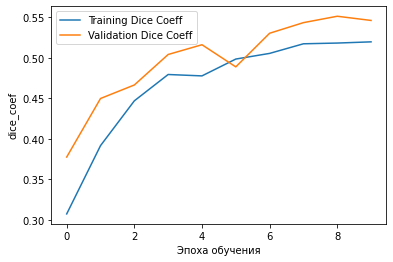

In [51]:
plt.plot(history_unet.history['dice_coef'], 
         label='Training Dice Coeff')
plt.plot(history_unet.history['val_dice_coef'], 
         label='Validation Dice Coeff')
plt.xlabel('Эпоха обучения')
plt.ylabel('dice_coef')
plt.legend()
plt.show()

In [52]:
# проверяем работу сети на тестовой выборке

preds = model_unet.predict(x_test,batch_size=bs,verbose = 1 )

13/13 [==============================] - 0s 12ms/step


In [53]:
i = iter(range(1000))

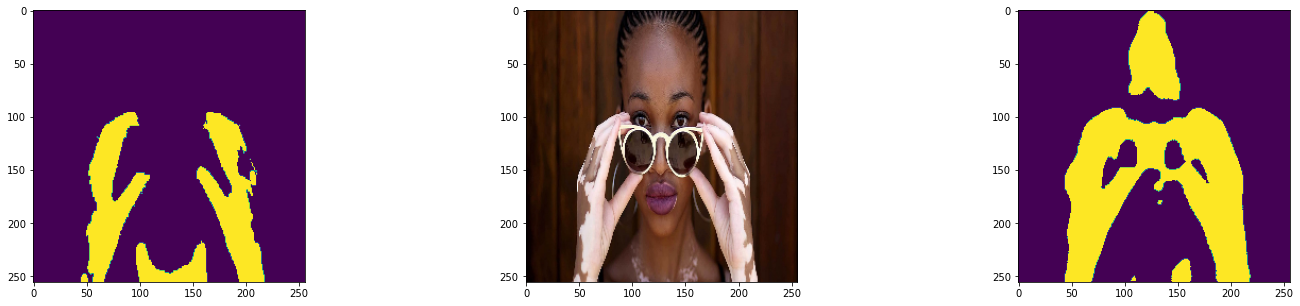

In [54]:
# Визуализируем полученный результат
# по центру - входное изображение, слева - то, что должна была выделить сеть, справа - результат ее работы

f, ax = plt.subplots(1,3, figsize=(25, 5))
n = next(i)
ax[0].imshow(255 * ohe_y_test[n] )
pred_img = 255 * np.uint8(np.round(preds[n]))[:, :, -1]
ax[2].imshow(pred_img)
ax[1].imshow(XX_test[n])

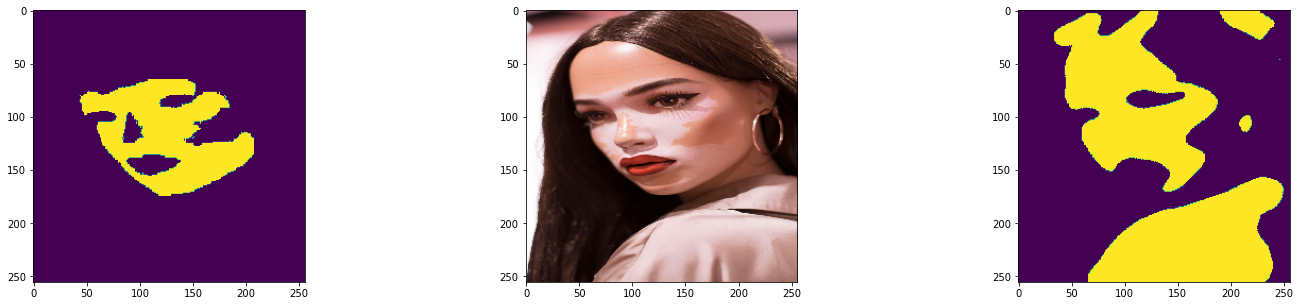

In [61]:
f, ax = plt.subplots(1,3, figsize=(25, 5))
n = next(i)
ax[0].imshow(255 * ohe_y_test[n] )
pred_img = 255 * np.uint8(np.round(preds[n]))[:, :, -1]
ax[2].imshow(pred_img)
ax[1].imshow(XX_test[n])

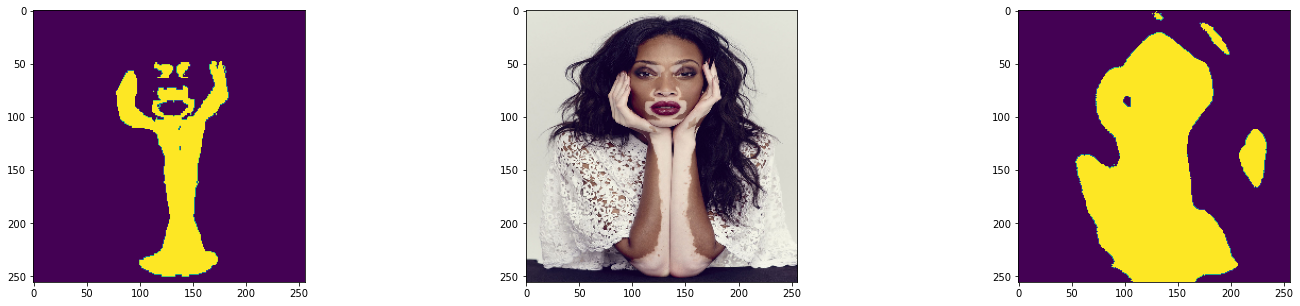

In [62]:
f, ax = plt.subplots(1,3, figsize=(25, 5))
n = next(i)
ax[0].imshow(255 * ohe_y_test[n] )
pred_img = 255 * np.uint8(np.round(preds[n]))[:, :, -1]
ax[2].imshow(pred_img)
ax[1].imshow(XX_test[n])

In [ ]:
#UNet показала результаты хуже, чем PSPNet. были проведены эксперименты с различными функциями активации в полседнем слое. Лучшей
# оказалась sigmoid. но значения Dice коэффициента не получилось довести до 1 с такой архитектурой сети. В результате 
# сеть закрашивает лишние пиксели, но результат ее работы не менее интересный